In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news_articles.csv


In [2]:
news=pd.read_csv('/kaggle/input/news_articles.csv')# reading the file

In [3]:
print(news.columns)
print('\n')
print(news.dtypes)
news.head()

Index(['Article_Id', 'Title', 'Author', 'Date', 'Content', 'URL'], dtype='object')


Article_Id     int64
Title         object
Author        object
Date          object
Content       object
URL           object
dtype: object


,Article_Id,Title,Author,Date,Content,URL
0,0,14 dead after bus falls into canal in Telangan...,Devyani Sultania,"August 22, 2016 12:34 IST",At least 14 people died and 17 others were inj...,http://www.ibtimes.co.in/14-dead-after-bus-fal...
1,1,Pratibha Tiwari molested on busy road Saath ...,Suparno Sarkar,"August 22, 2016 19:47 IST",TV actress Pratibha Tiwari who is best known ...,NaN
2,2,US South Korea begin joint military drill ami...,Namrata Tripathi,"August 22, 2016 18:10 IST",The United States and South Korea began a join...,http://www.ibtimes.co.in/us-south-korea-begin-...
3,3,Illegal construction in Bengaluru Will my hou...,S V Krishnamachari,"August 22, 2016 17:39 IST",The relentless drive by Bengaluru s Bangalore...,http://www.ibtimes.co.in/illegal-construction-...
4,4,Punjab Gau Rakshak Dal chief held for assaulti...,Pranshu Rathee,"August 22, 2016 17:34 IST",Punjab Gau Raksha Dal chief Satish Kumar and h...,http://www.ibtimes.co.in/punjab-gau-rakshak-da...


In [4]:
news['len_content']=news['Content'].apply(lambda x : len(x))
news.head()

,Article_Id,Title,Author,Date,Content,URL,len_content
0,0,14 dead after bus falls into canal in Telangan...,Devyani Sultania,"August 22, 2016 12:34 IST",At least 14 people died and 17 others were inj...,http://www.ibtimes.co.in/14-dead-after-bus-fal...,1355
1,1,Pratibha Tiwari molested on busy road Saath ...,Suparno Sarkar,"August 22, 2016 19:47 IST",TV actress Pratibha Tiwari who is best known ...,NaN,1215
2,2,US South Korea begin joint military drill ami...,Namrata Tripathi,"August 22, 2016 18:10 IST",The United States and South Korea began a join...,http://www.ibtimes.co.in/us-south-korea-begin-...,1369
3,3,Illegal construction in Bengaluru Will my hou...,S V Krishnamachari,"August 22, 2016 17:39 IST",The relentless drive by Bengaluru s Bangalore...,http://www.ibtimes.co.in/illegal-construction-...,2024
4,4,Punjab Gau Rakshak Dal chief held for assaulti...,Pranshu Rathee,"August 22, 2016 17:34 IST",Punjab Gau Raksha Dal chief Satish Kumar and h...,http://www.ibtimes.co.in/punjab-gau-rakshak-da...,1467


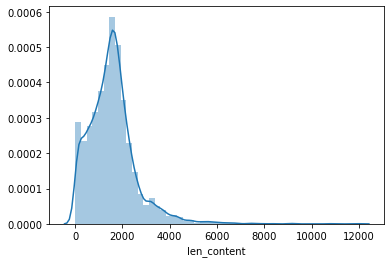

In [5]:
import seaborn as sns
sns.distplot(news['len_content'])

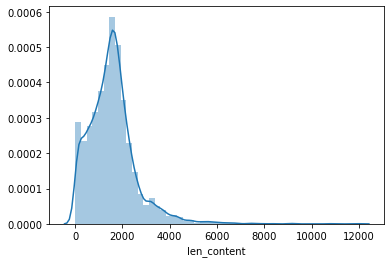

In [6]:
sns_plot=sns.distplot(news['len_content'])
figure = sns_plot.get_figure()   
figure.savefig('/kaggle/working/length.png')

## Problem with BERT based models
So to create document embeddings we cannot diretly use **BERT** because the  limitation of BERT is it can only take input 512 tokens input only

In [7]:
import torch
from transformers import LongformerModel, LongformerTokenizer

model = LongformerModel.from_pretrained('allenai/longformer-base-4096',output_hidden_states = True)
tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')

# Put the model in "evaluation" mode, meaning feed-forward operation.
model.eval()


wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


LongformerModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(50265, 768, padding_idx=1)
    (position_embeddings): Embedding(4098, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): LongformerSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (query_global): Linear(in_features=768, out_features=768, bias=True)
            (key_global): Linear(in_features=768, out_features=768, bias=True)
            (value_global): Linear(in_features=768, out_features=768, bias=True)
          )
          (output): BertSelfOutpu

In [8]:
# SAMPLE_TEXT = "he is damntall and lanky"  # long input document
# input_ids = torch.tensor(tokenizer.encode(SAMPLE_TEXT)).unsqueeze(0)  # batch of size 1

# # Attention mask values -- 0: no attention, 1: local attention, 2: global attention
# attention_mask = torch.ones(input_ids.shape, dtype=torch.long, device=input_ids.device) # initialize to local attention
# attention_mask[:, [0,-1]] = 2  # Set global attention based on the task. For example,
#                                     # classification: the <s> token
#                                     # QA: question tokens
#                                     # LM: potentially on the beginning of sentences and paragraphs
# print(attention_mask)
# print(input_ids)

In [9]:
# # Run the text through BERT, and collect all of the hidden states produced
# # from all 12 layers. 
# with torch.no_grad():

#     outputs = model(input_ids, attention_mask=attention_mask)

#     # Evaluating the model will return a different number of objects based on 
#     # how it's  configured in the `from_pretrained` call earlier. In this case, 
#     # becase we set `output_hidden_states = True`, the third item will be the 
#     # hidden states from all layers. See the documentation for more details:
#     # https://huggingface.co/transformers/model_doc/bert.html#bertmodel
#     hidden_states = outputs[2]

In [10]:
# #pooled output not good reprsentative of sentence
# # BERT DOcumentation says this

# print(outputs[0].shape) # sequence output
# print(outputs[1].shape)#  pooled output now

In [11]:
# print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 Longformer layers)")
# layer_i = 0

# print ("Number of batches:", len(hidden_states[layer_i]))
# batch_i = 0

# print ("Number of tokens:", len(hidden_states[layer_i][batch_i]))
# token_i = 0

# print ("Number of hidden units:", len(hidden_states[layer_i][batch_i][token_i]))

In [12]:
# # `hidden_states` is a Python list.
# print('      Type of hidden_states: ', type(hidden_states))

# # Each layer in the list is a torch tensor.
# print('Tensor shape for each layer: ', hidden_states[0].size())

In [13]:
# # Concatenate the tensors for all layers. We use `stack` here to
# # create a new dimension in the tensor.
# token_embeddings = torch.stack(hidden_states, dim=0)

# token_embeddings.size()

In [14]:
# # Remove dimension 1, the "batches".
# token_embeddings = torch.squeeze(token_embeddings, dim=1)

# token_embeddings.size()

In [15]:
# # Swap dimensions 0 and 1.
# token_embeddings = token_embeddings.permute(1,0,2)

# token_embeddings.size()
# #this means we have 13 vector representations each of 768 length for each 1024 tokens

## Summing the results from last 4 layers of Model
## to get word embedding

In [16]:
# # Stores the token vectors, with shape [1024 x 768]
# token_vecs_sum = []

# # `token_embeddings` is a [1024 x 13 x 768] tensor.

# # For each token in the sentence...
# for token in token_embeddings:

#     # `token` is a [13 x 768] tensor

#     # Sum the vectors from the last four layers.
#     sum_vec = torch.sum(token[-4:], dim=0)
    
#     # Use `sum_vec` to represent `token`.
#     token_vecs_sum.append(sum_vec)

# print ('Shape is: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))

In [17]:


# def sentence_embed():
#     h=0
#     for i in  range(len(token_vecs_sum)):
#         h+=token_vecs_sum[i]
#     return h
# f=sentence_embed()
# print(f[:10])
# print(f.shape)

## To get Sentence embedding

To get a single vector for our entire sentence we have multiple application-dependent strategies, but a simple approach is to average the second to last hiden layer of each token producing a single 768 length vector.

In [18]:
# # `hidden_states` has shape [13 x 1 x 1024 x 768]

# # `token_vecs` is a tensor with shape [1024 x 768]
# token_vecs = hidden_states[-2][0]

# # Calculate the average of all 1024 token vectors.
# sentence_embedding = torch.mean(token_vecs, dim=0)

In [19]:
# print ("Our final sentence embedding vector of shape:", sentence_embedding.size())

#############################

In [20]:
all_content=list(news['Content'][:5])
#doing only for first 5 contents
# because doing for complete takes 2 hours on CPU

def sentence_bert():
    list_of_emb=[]
    for i in range(len(all_content)):
        print(i)
        SAMPLE_TEXT = all_content[i]  # long input document
        input_ids = torch.tensor(tokenizer.encode(SAMPLE_TEXT)).unsqueeze(0)  # batch of size 1

        # Attention mask values -- 0: no attention, 1: local attention, 2: global attention
        attention_mask = torch.ones(input_ids.shape, dtype=torch.long, device=input_ids.device) # initialize to local attention
        attention_mask[:, [0,-1]] = 2  # Set global attention based on the task. For example,
                                            # classification: the <s> token
                                            # QA: question tokens
                                            # LM: potentially on the beginning of sentences and paragraphs

        # we have set <s> and </s> token's attention mask =2
        # because acc to Longformer documentation these tokens must be given 
        # global attention when we are doing sentence classification
        # Run the text through BERT, and collect all of the hidden states produced


        # from all 12 layers. 
        with torch.no_grad():

            outputs = model(input_ids, attention_mask=attention_mask)

            # Evaluating the model will return a different number of objects based on 
            # how it's  configured in the `from_pretrained` call earlier. In this case, 
            # becase we set `output_hidden_states = True`, the third item will be the 
            # hidden states from all layers. See the documentation for more details:
            # https://huggingface.co/transformers/
            hidden_states = outputs[2]


        # Concatenate the tensors for all layers. We use `stack` here to
        # create a new dimension in the tensor.
        token_embeddings = torch.stack(hidden_states, dim=0)

        # Remove dimension 1, the "batches".
        token_embeddings = torch.squeeze(token_embeddings, dim=1)
        # Swap dimensions 0 and 1.
        token_embeddings = token_embeddings.permute(1,0,2)


        token_vecs_sum = []



        # For each token in the sentence...
        for token in token_embeddings:

            

            # mean the vectors from the last four layers.
#             sum_vec = torch.mean(token[-4:], dim=0)
            
            #but preferrable is
            sum_vec=torch.sum(token[-4:],dim=0)

            # Use `sum_vec` to represent `token`.
            token_vecs_sum.append(sum_vec)

#         print ('Shape is: %d x %d' % (len(token_vecs_sum), len(token_vecs_sum[0])))

        h=0
        for i in  range(len(token_vecs_sum)):
            h+=token_vecs_sum[i]
            
            
        list_of_emb.append(h)
    return list_of_emb
f=sentence_bert()
print(len(f))
    

0
1
2
3
4
5


In [21]:
f[0].shape

torch.Size([768])

In [22]:
import pickle
with open("/kaggle/working/emeddings_bert_mean.txt", "wb") as fp:
    pickle.dump(f, fp)

/opt/conda/lib/python3.7/site-packages/torch/storage.py:34: FutureWarning: pickle support for Storage will be removed in 1.5. Use `torch.save` instead
  warnings.warn("pickle support for Storage will be removed in 1.5. Use `torch.save` instead", FutureWarning)
